In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
df = pd.read_csv('Crop_recommendation.csv')

In [203]:
df.sample(7)

,N,P,K,temperature,humidity,ph,rainfall,label
195,90,57,24,18.928519,72.800861,6.158860,82.341629,maize
1847,7,15,32,25.035124,95.897400,6.182233,174.796583,coconut
1316,102,14,52,26.794899,89.648152,6.510760,57.740918,watermelon
1257,19,120,195,18.739322,81.121092,5.931538,73.558080,grapes
285,37,78,79,19.952648,14.826331,7.786366,88.681031,chickpea
598,2,51,17,25.876823,45.963419,5.838509,38.532547,mothbeans
1140,2,38,33,32.386975,53.232824,4.691396,90.216332,mango


In [204]:
df['label'].value_counts().count()

np.int64(22)

In [205]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2200 entries, 0 to 2199
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   N            2200 non-null   int64  
 1   P            2200 non-null   int64  
 2   K            2200 non-null   int64  
 3   temperature  2200 non-null   float64
 4   humidity     2200 non-null   float64
 5   ph           2200 non-null   float64
 6   rainfall     2200 non-null   float64
 7   label        2200 non-null   object 
dtypes: float64(4), int64(3), object(1)
memory usage: 137.6+ KB


<Axes: ylabel='ph'>

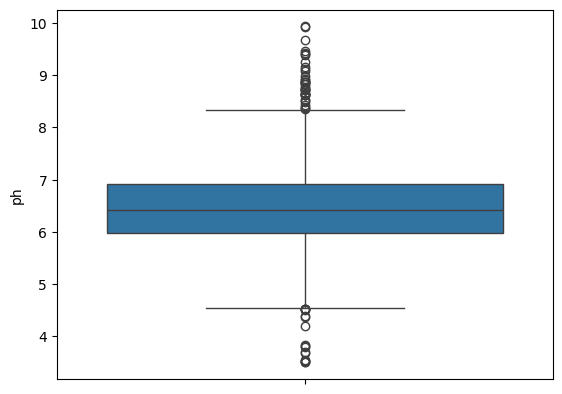

In [206]:
sns.boxplot(df['ph'])

In [207]:
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

In [208]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

In [209]:
x_train, x_test, y_train, y_test = train_test_split(df.drop(columns='label'), df['label'], test_size=0.2)

In [210]:
x_test

,N,P,K,temperature,humidity,ph,rainfall
563,28,57,17,30.477577,61.582453,9.416003,61.866339
1853,24,27,34,28.878630,95.113203,6.203377,145.058312
1282,1,132,200,16.278528,82.942701,5.620746,66.574628
1011,101,87,54,29.073111,76.500452,6.376757,100.169264
353,3,77,25,24.849062,22.894646,5.608165,62.212922
...,...,...,...,...,...,...,...
2149,82,29,35,26.673772,52.242263,6.246872,156.154390
1694,6,13,9,34.514240,90.561515,7.786725,118.327197
1551,20,139,202,23.502014,92.210840,5.669991,107.986895
1473,94,5,55,28.585465,91.892168,6.085682,26.883726


In [211]:
le = LabelEncoder()
y_train1 = le.fit_transform(y_train)
y_test1 = le.fit_transform(y_test)

In [212]:
from sklearn.metrics import accuracy_score, r2_score

In [213]:
y_pred = pipe.predict(x_test)
accuracy_score(y_test1, y_pred)

0.9590909090909091

In [214]:
classes = np.unique(y_test1)
classes

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [215]:
sgd = SGDClassifier()

In [216]:
sgd.fit(x_train, y_train1)

SGDClassifier()

In [217]:
pred1 = sgd.predict(x_test)

In [218]:
accuracy_score(y_test1, pred1)

0.7772727272727272

In [219]:
sgd.partial_fit(x_test, y_test1, classes=classes)

SGDClassifier()

In [220]:
pred2 = sgd.predict(x_test)

In [221]:
accuracy_score(y_test1, pred2)

0.8613636363636363